In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import dill as pickle
import os, sys
import scipy.interpolate as intp
import bead_util as bu
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
%matplotlib inline

from symmetric_attractor_profile import attractor_profile
from holes_analysis import holes_data, holes_analysis

In [2]:
parent = '/home/emmetth/gravity_sim'
os.chdir(parent)
full_path = parent+'/sim_data/square_slots_new/'

PS = holes_data(data_dir=full_path)
data = PS.data

In [12]:
edges = sorted(PS.from_edges)
hrs = sorted(PS.hrs)

In [13]:
p0 = 7,edges[0],hrs[0],5.0,5.0
FM0 = holes_analysis(data, p0)

yuh = FM0.sum_harmonics(w=1, fsamp=5e3, num_harmonics=10, verbose=True)
yuh[:,0]

First 10 harmonics:

           Radial     Angular     Axial
Newtonian: 5.779e-25  2.967e-25   1.628e-25
Yukawa:
l=1.00um: 2.840e-28  1.009e-29   9.567e-30
l=10.00um: 3.363e-25  8.417e-26   8.075e-26



array([  5.77935722e-25,   2.84046789e-28,   3.36275098e-25])

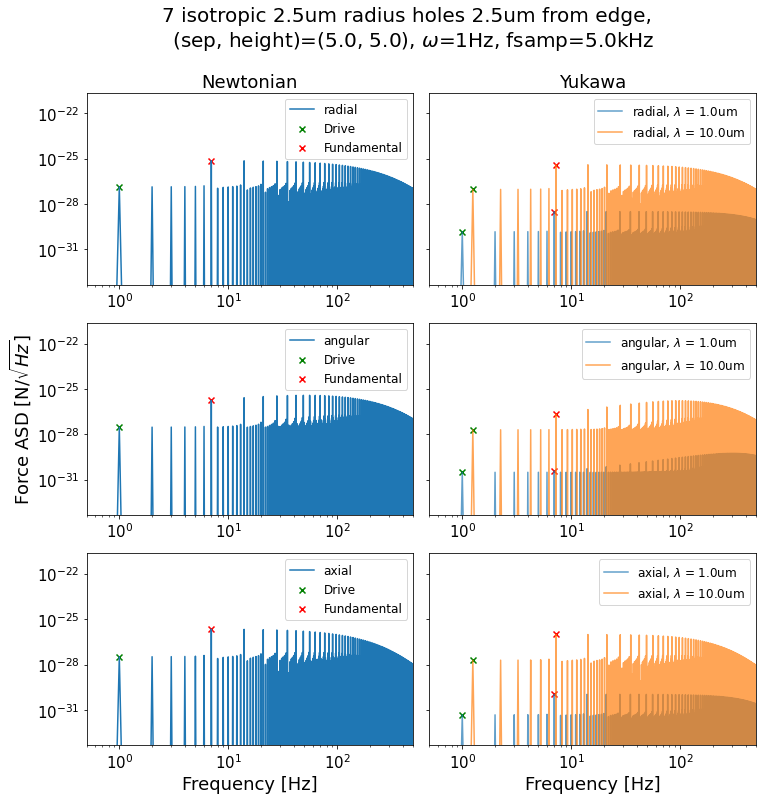

In [14]:
FM0.plot_asd()

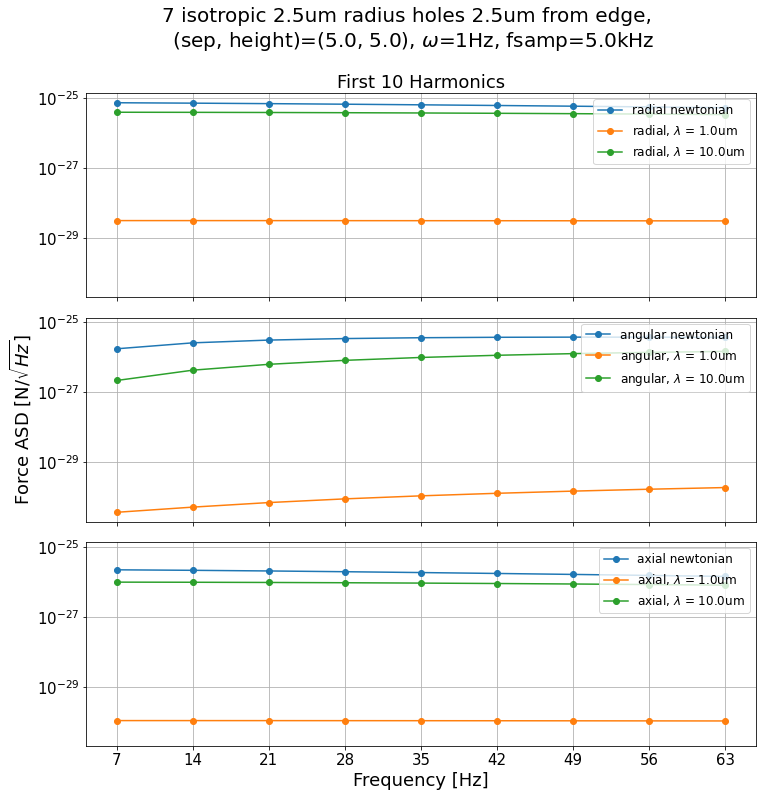

In [15]:
FM0.plot_signals()

In [72]:
harms_rad = np.zeros((len(edges), len(hrs), 3))
sep, height = 5.0,5.0

for i,edge in enumerate(edges):
    for j,hr in enumerate(hrs):
        p = 7,edge,hr,sep,height
        FM = holes_analysis(data, p)
        harms = FM.sum_harmonics(w=1, fsamp=5e3, num_harmonics=10)
        harms_rad[i,j,:] = harms[:,0]

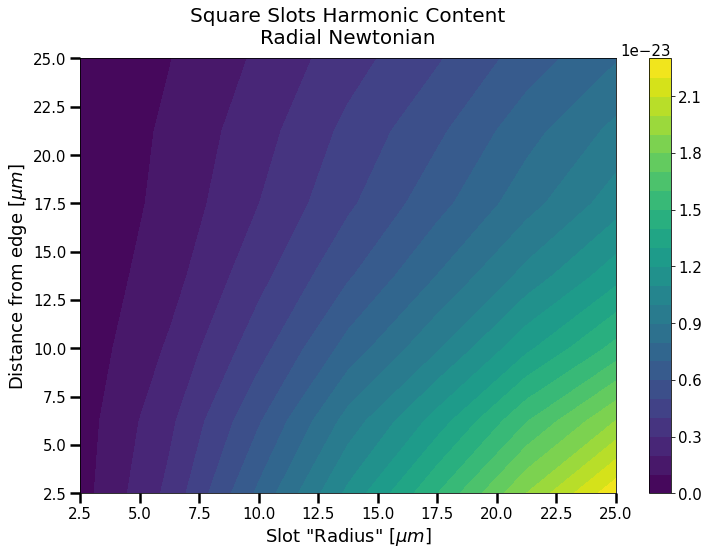

In [73]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
plt.contourf(edges, hrs, harms_rad[:,:,0], levels=25)
plt.colorbar()
plt.ylabel('Distance from edge [$\mu m$]', fontsize=18)
plt.xlabel('Slot "Radius" [$\mu m$]', fontsize=18)
plt.title('Square Slots Harmonic Content\nRadial Newtonian', fontsize=20, y=1.02)
plt.tick_params('both', length=10, width=2.5, which='major', labelsize=15)
plt.tick_params('both', length=10, width=2.5, which='minor')
# plt.savefig('slots_dist_radius.png', dpi=150)
plt.show()

## Comparison to holes

In [74]:
holes_harm_rad = np.load('holes_harm_rad_new.npy')

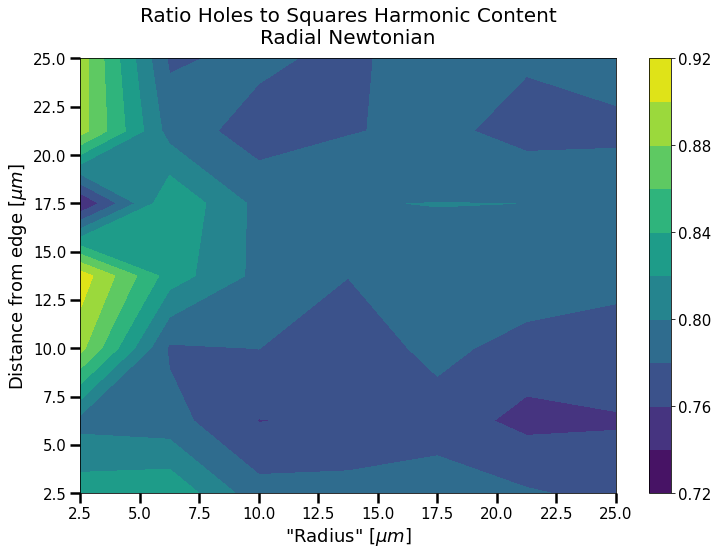

In [79]:
plt.rcParams['figure.figsize'] = (12,8)
plt.contourf(edges, hrs, (holes_harm_rad/harms_rad)[:,:,0], levels=10)
plt.colorbar()
plt.ylabel('Distance from edge [$\mu m$]', fontsize=18)
plt.xlabel('"Radius" [$\mu m$]', fontsize=18)
plt.title('Ratio Holes to Squares Harmonic Content\nRadial Newtonian', fontsize=20, y=1.02)
plt.tick_params('both', length=10, width=2.5, which='major', labelsize=15)
plt.tick_params('both', length=10, width=2.5, which='minor')
# plt.savefig('square_holes_newt.png', dpi=150)
plt.show()

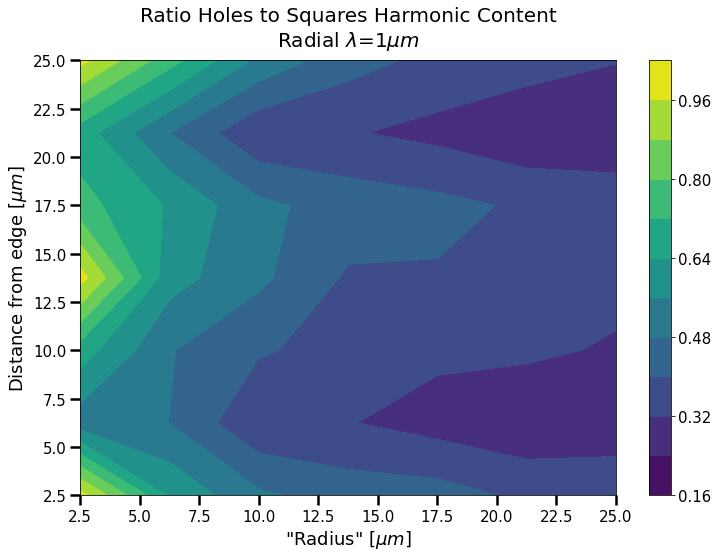

In [80]:
plt.rcParams['figure.figsize'] = (12,8)
plt.contourf(edges, hrs, (holes_harm_rad/harms_rad)[:,:,1], levels=10)
plt.colorbar()
plt.ylabel('Distance from edge [$\mu m$]', fontsize=18)
plt.xlabel('"Radius" [$\mu m$]', fontsize=18)
plt.title('Ratio Holes to Squares Harmonic Content\nRadial $\lambda$=1$\mu m$', fontsize=20, y=1.02)
plt.tick_params('both', length=10, width=2.5, which='major', labelsize=15)
plt.tick_params('both', length=10, width=2.5, which='minor')
# plt.savefig('squares_holes_1um.png', dpi=150)
plt.show()

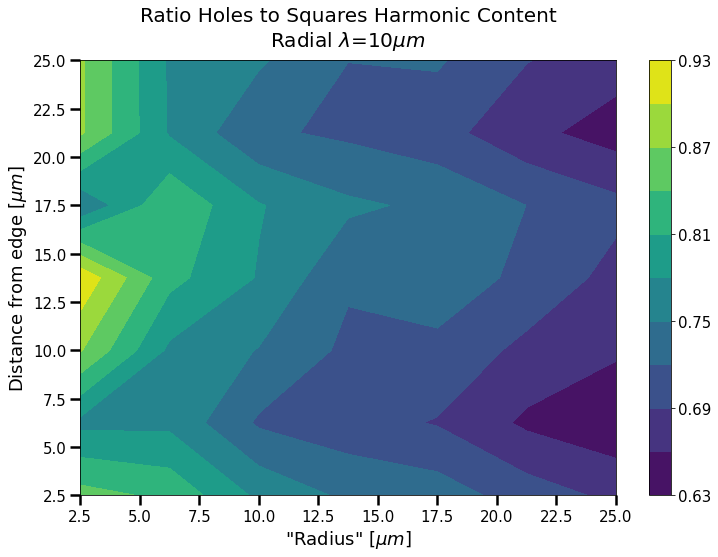

In [81]:
plt.rcParams['figure.figsize'] = (12,8)
plt.contourf(edges, hrs, (holes_harm_rad/harms_rad)[:,:,2], levels=10)
plt.colorbar()
plt.ylabel('Distance from edge [$\mu m$]', fontsize=18)
plt.xlabel('"Radius" [$\mu m$]', fontsize=18)
plt.title('Ratio Holes to Squares Harmonic Content\nRadial $\lambda$=10$\mu m$', fontsize=20, y=1.02)
plt.tick_params('both', length=10, width=2.5, which='major', labelsize=15)
plt.tick_params('both', length=10, width=2.5, which='minor')
# plt.savefig('squares_holes_10um.png', dpi=150)
plt.show()

This is not at all what I expected, but it makes sense as the absolute magnitude increases with both hole size and distance from edge, so to see the feature matching in a colorbar one would need to normalize the peaks to each other or something similar.

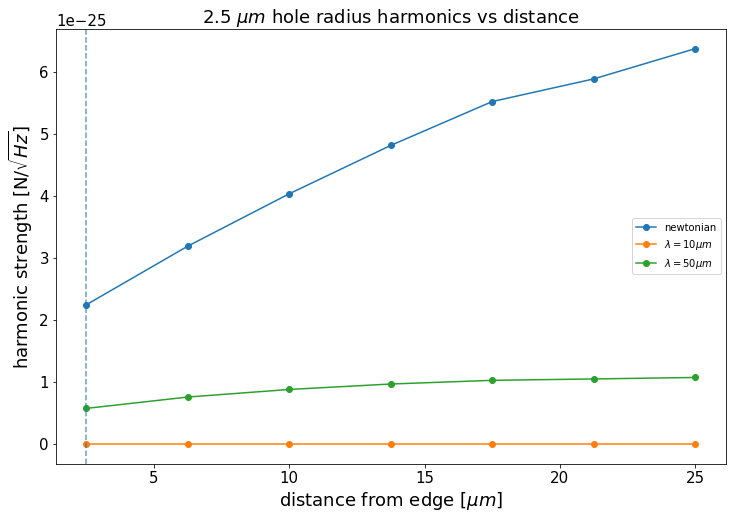

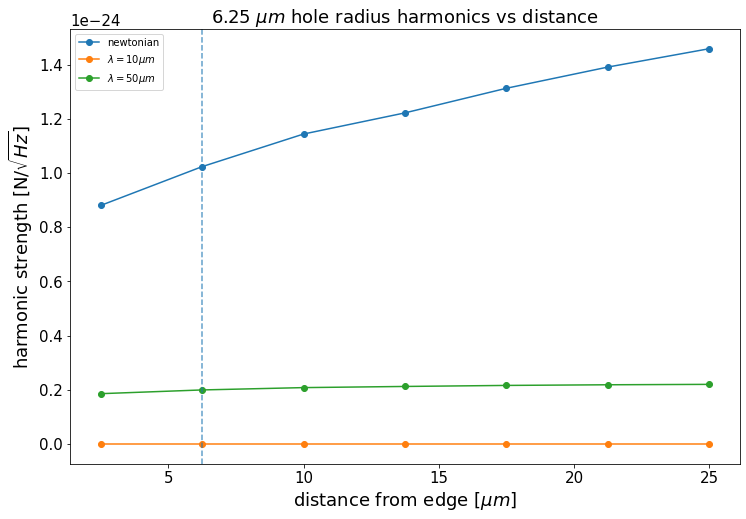

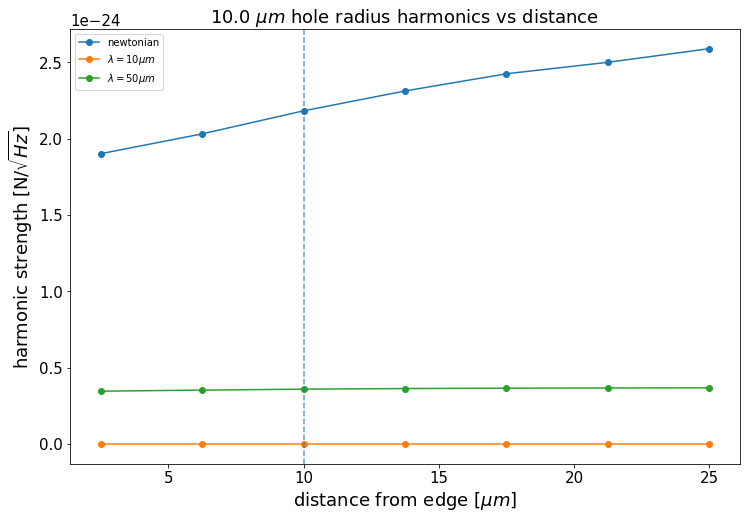

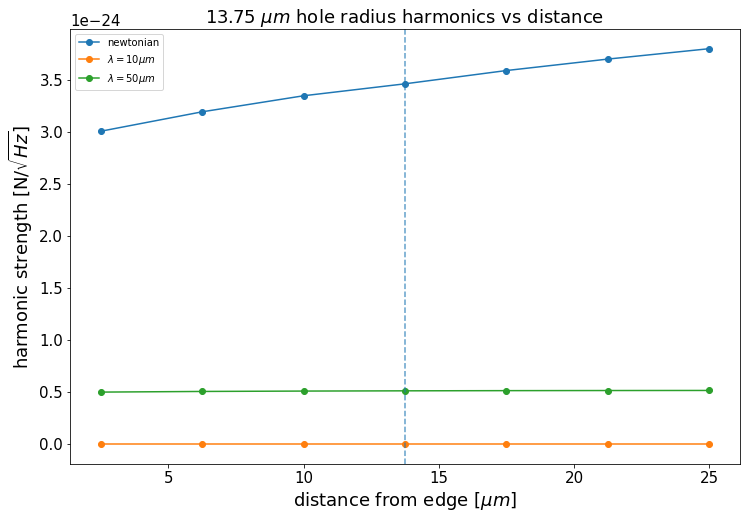

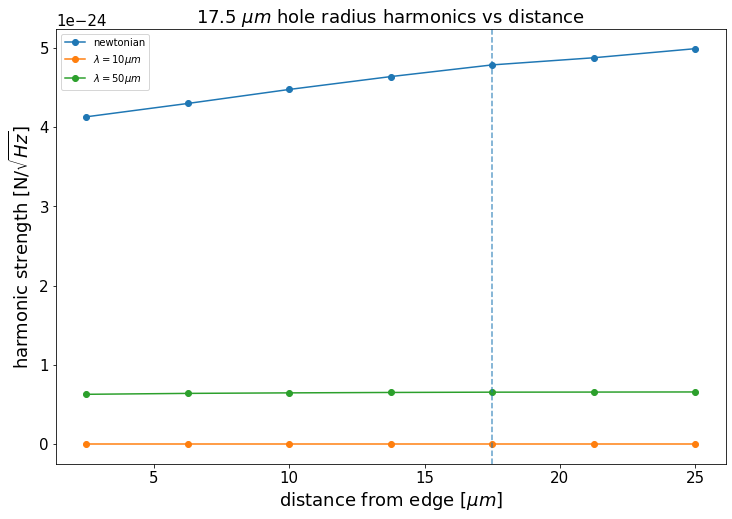

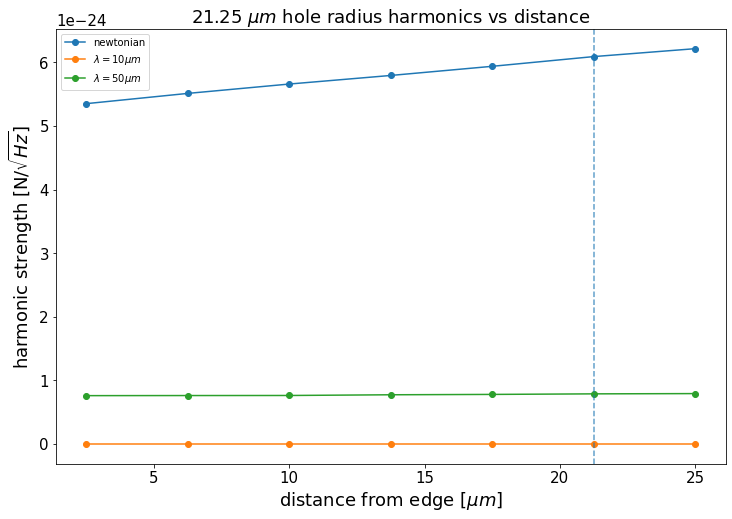

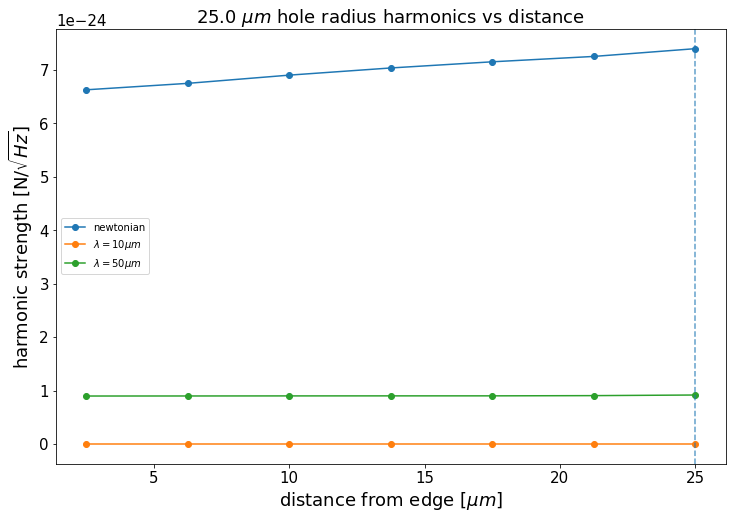

In [71]:
for i,hr in enumerate(hrs):
    plt.plot(edges, harms_rad[:,i,:], 'o-')
    plt.legend(['newtonian', '$\lambda=10\mu m$', '$\lambda=50\mu m$'])
    plt.xlabel('distance from edge [$\mu m$]', fontsize=18)
    plt.ylabel('harmonic strength [N/$\sqrt{Hz}$]', fontsize=18)
    plt.axvline(hr, ls='--', alpha=0.7)
    plt.title(f'{hr} $\mu m$ hole radius harmonics vs distance', fontsize=18, y=1)
    plt.savefig(f'feature_matching_plots/{hr}.png', dpi=150)
    plt.show()

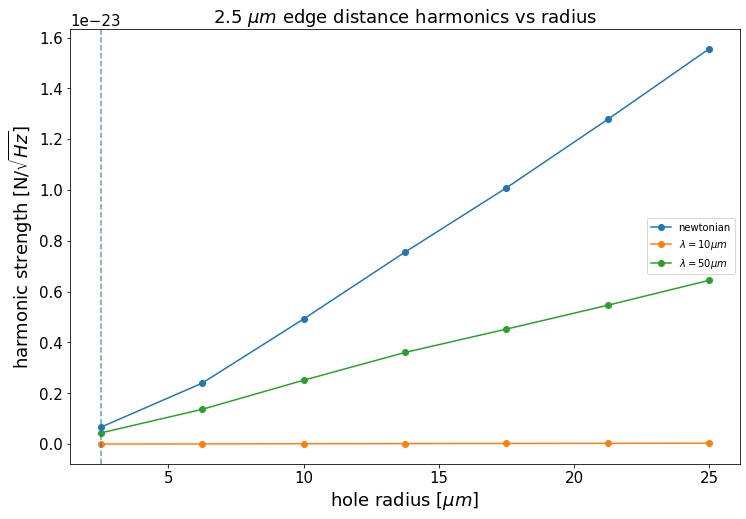

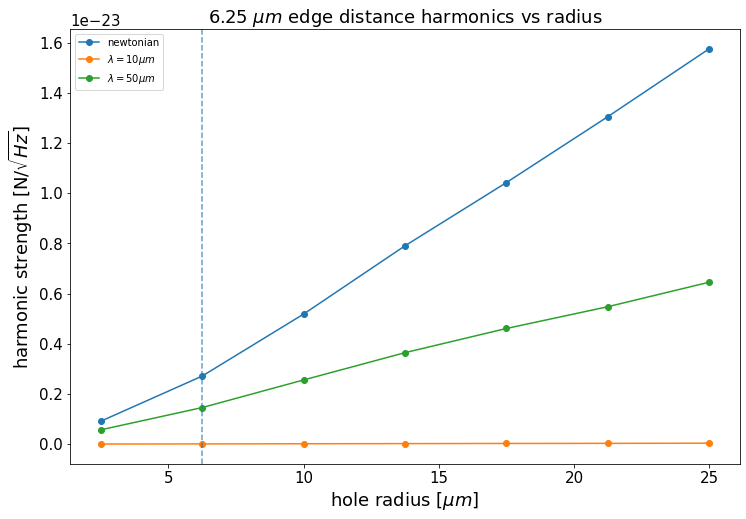

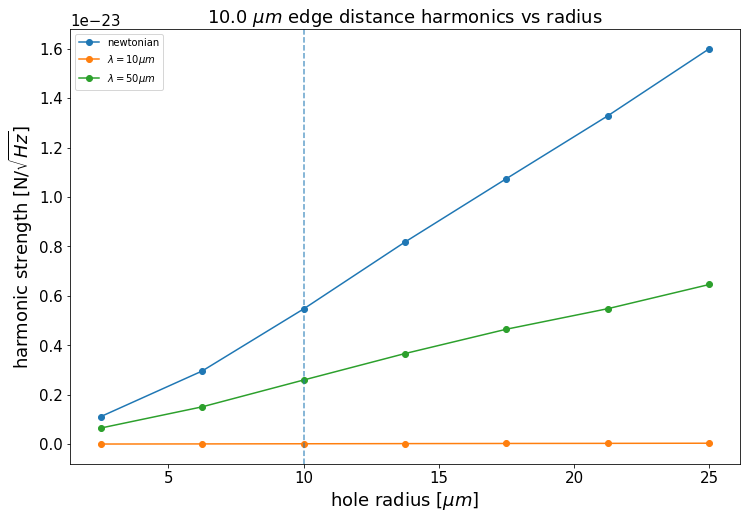

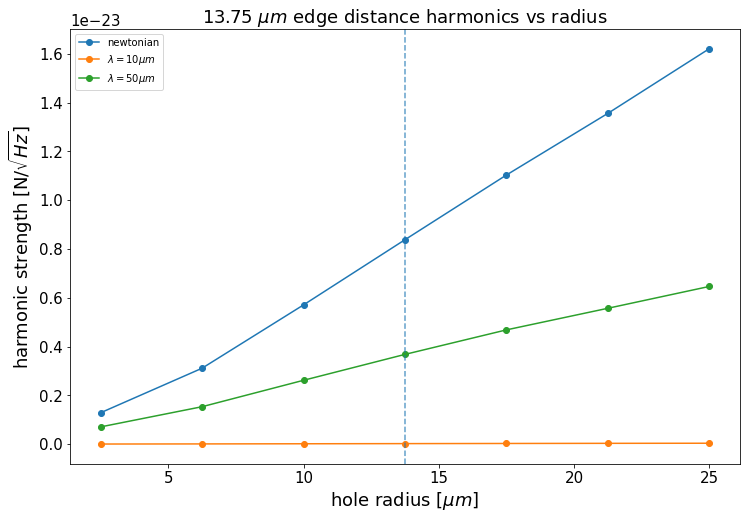

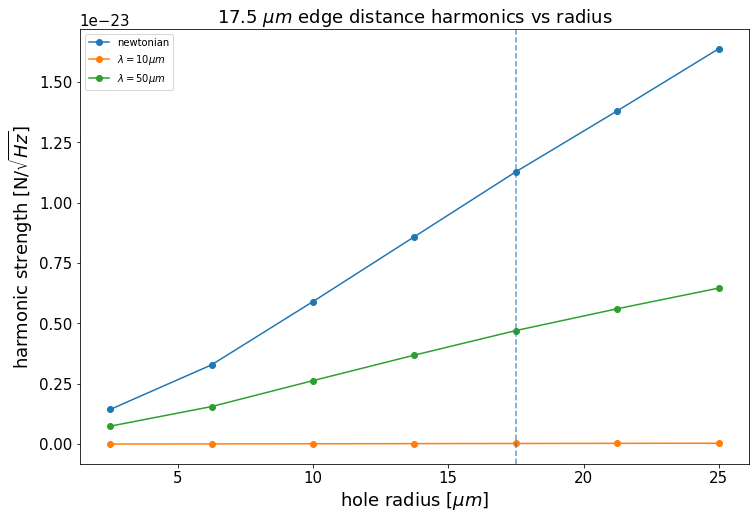

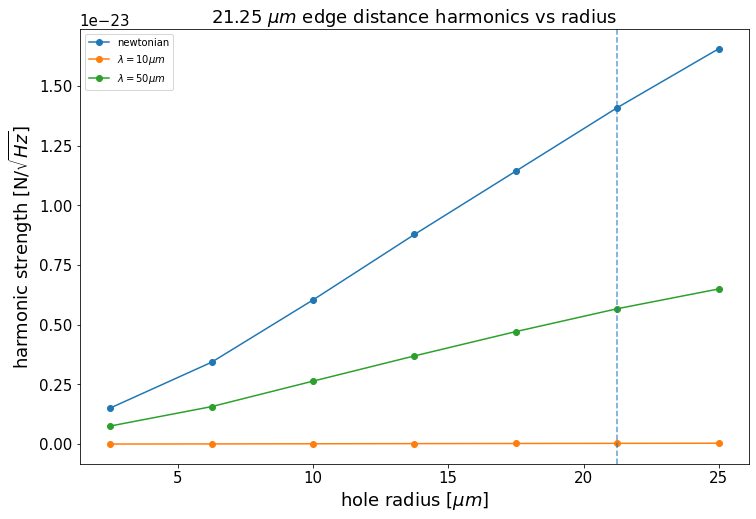

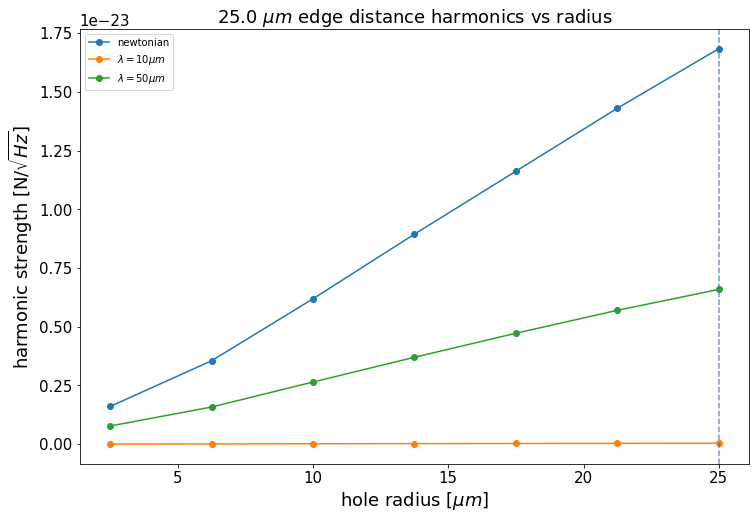

In [37]:
for i,edge in enumerate(edges):
    plt.plot(edges, harms_rad[i,:,:], 'o-')
    plt.legend(['newtonian', '$\lambda=10\mu m$', '$\lambda=50\mu m$'])
    plt.xlabel('hole radius [$\mu m$]', fontsize=18)
    plt.ylabel('harmonic strength [N/$\sqrt{Hz}$]', fontsize=18)
    plt.axvline(edge, ls='--', alpha=0.7)
    plt.title(f'{edge} $\mu m$ edge distance harmonics vs radius', fontsize=18)
    if edge == 17.5:
        plt.savefig('feature_matching_plots/radius/17.5.png', dpi=150)
    plt.show()